In [32]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [25]:
# Cargar los datos
cliente = pd.read_csv("Mall_Customers.csv")

In [26]:
# Explorar las primeras filas del dataset
print(cliente.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [28]:
# Obtener información sobre el dataset
print(cliente.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [29]:
# Resumen estadístico de las variables numéricas
print(cliente.describe())


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [30]:
# Manejar valores faltantes si los hay
cliente.dropna(inplace=True)

In [42]:
# Separar las características (X) y la variable objetivo (y)
X = cliente.drop(['CustomerID','Gender'], axis=1)  # Suponiendo que 'CustomerID' no es una característica relevante
y = cliente['CustomerID']


In [43]:
clf = RandomForestClassifier(n_estimators=50, random_state=12)

In [44]:
clf.fit(X, y)

RandomForestClassifier(n_estimators=50, random_state=12)

In [45]:
selector = SelectFromModel(clf, threshold=81)  # Puedes ajustar el umbral según sea necesario
selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=50,
                                                 random_state=12),
                threshold=81)

In [46]:
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:",y)

Características seleccionadas: 0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: CustomerID, Length: 200, dtype: int64


In [47]:
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:",X)

Características seleccionadas:      Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


In [49]:
from sklearn.cluster import KMeans

# Entrenar el modelo K-means
kmeans = KMeans(n_clusters=5, random_state=42)  # Número de clusters a ser determinado
kmeans.fit(scaled_data)


KMeans(n_clusters=5, random_state=42)

In [50]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calcular el Coeficiente de Silhouette
silhouette_score_kmeans = silhouette_score(scaled_data, kmeans.labels_)
print("Coeficiente de Silhouette para K-means:", silhouette_score_kmeans)

# Calcular el Índice de Calinski-Harabasz
calinski_harabasz_score_kmeans = calinski_harabasz_score(scaled_data, kmeans.labels_)
print("Índice de Calinski-Harabasz para K-means:", calinski_harabasz_score_kmeans)


Coeficiente de Silhouette para K-means: -0.03340874261052762
Índice de Calinski-Harabasz para K-means: 4.459070086765255


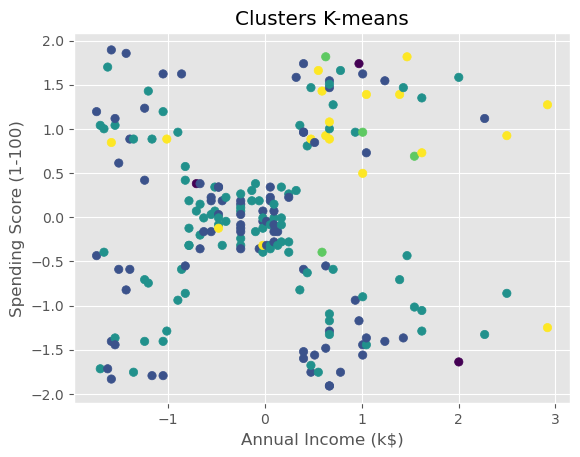

In [51]:
import matplotlib.pyplot as plt

# Visualizar los clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters K-means')
plt.show()
